In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve)
from sklearn.preprocessing import StandardScaler
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from fairlearn.reductions import ExponentiatedGradient, DemographicParity
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Reading
file_path = "Most-Recent-Cohorts-Institution.csv"
df = pd.read_csv(file_path, low_memory=False)

In [3]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
0,100654,100200.0,1002.0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,800.0,777.0,0.6250,36650.0,41070.0,47016.0,38892.0,41738.0,38167.0,40250.0
1,100663,105200.0,1052.0,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,https://tcc.ruffalonl.com/University of Alabam...,...,1811.0,1157.0,0.7588,47182.0,51896.0,54368.0,50488.0,51505.0,46559.0,59181.0
2,100690,2503400.0,25034.0,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,https://www.amridgeuniversity.edu/,https://www2.amridgeuniversity.edu:9091/,...,75.0,67.0,0.5986,35752.0,41007.0,NaN,NaN,38467.0,32654.0,49435.0
3,100706,105500.0,1055.0,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,finaid.uah.edu/,...,810.0,802.0,0.7810,51208.0,62219.0,62577.0,55920.0,60221.0,47787.0,67454.0
4,100724,100500.0,1005.0,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,1224.0,1049.0,0.5378,32844.0,36932.0,37966.0,34294.0,31797.0,32303.0,36964.0


In [4]:
df.tail()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,COUNT_WNE_MALE0_P11,COUNT_WNE_MALE1_P11,GT_THRESHOLD_P11,MD_EARN_WNE_INC1_P11,MD_EARN_WNE_INC2_P11,MD_EARN_WNE_INC3_P11,MD_EARN_WNE_INDEP0_P11,MD_EARN_WNE_INDEP1_P11,MD_EARN_WNE_MALE0_P11,MD_EARN_WNE_MALE1_P11
6479,49178301,4270802.0,42708.0,Wilton Simpson Technical College,Brooksville,FL,346134904,Council on Occupational Education,https://hernandoschools.org/schools/stc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6480,49425001,2609404.0,26094.0,Valley College - Fairlawn - School of Nursing,Fairlawn,OH,443333631,Accrediting Commission of Career Schools and C...,https://www.valley.edu/,NaN,...,76.0,NaN,0.4651,26087.0,37545.0,NaN,NaN,28205.0,27499.0,NaN
6481,49501301,4247201.0,42472.0,Western Maricopa Education Center - Southwest ...,Buckeye,AZ,85326-5705,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,49501302,4247202.0,42472.0,Western Maricopa Education Center - Northeast ...,Phoenix,AZ,85027-0000,Council on Occupational Education,https://west-mec.edu/findyourhappy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6483,49664501,4285601.0,42856.0,Burlington County Institute of Technology - Ad...,Medford,NJ,080550000,Middle States Commission on Secondary Education,https://www.bcit.cc/bcitadulted,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(6484, 3305)

In [6]:
print(df.columns)

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'COUNT_WNE_MALE0_P11', 'COUNT_WNE_MALE1_P11', 'GT_THRESHOLD_P11',
       'MD_EARN_WNE_INC1_P11', 'MD_EARN_WNE_INC2_P11', 'MD_EARN_WNE_INC3_P11',
       'MD_EARN_WNE_INDEP0_P11', 'MD_EARN_WNE_INDEP1_P11',
       'MD_EARN_WNE_MALE0_P11', 'MD_EARN_WNE_MALE1_P11'],
      dtype='object', length=3305)


In [7]:
df.columns.tolist()

['UNITID',
 'OPEID',
 'OPEID6',
 'INSTNM',
 'CITY',
 'STABBR',
 'ZIP',
 'ACCREDAGENCY',
 'INSTURL',
 'NPCURL',
 'SCH_DEG',
 'HCM2',
 'MAIN',
 'NUMBRANCH',
 'PREDDEG',
 'HIGHDEG',
 'CONTROL',
 'ST_FIPS',
 'REGION',
 'LOCALE',
 'LOCALE2',
 'LATITUDE',
 'LONGITUDE',
 'CCBASIC',
 'CCUGPROF',
 'CCSIZSET',
 'HBCU',
 'PBI',
 'ANNHI',
 'TRIBAL',
 'AANAPII',
 'HSI',
 'NANTI',
 'MENONLY',
 'WOMENONLY',
 'RELAFFIL',
 'ADM_RATE',
 'ADM_RATE_ALL',
 'SATVR25',
 'SATVR75',
 'SATMT25',
 'SATMT75',
 'SATWR25',
 'SATWR75',
 'SATVRMID',
 'SATMTMID',
 'SATWRMID',
 'ACTCM25',
 'ACTCM75',
 'ACTEN25',
 'ACTEN75',
 'ACTMT25',
 'ACTMT75',
 'ACTWR25',
 'ACTWR75',
 'ACTCMMID',
 'ACTENMID',
 'ACTMTMID',
 'ACTWRMID',
 'SAT_AVG',
 'SAT_AVG_ALL',
 'PCIP01',
 'PCIP03',
 'PCIP04',
 'PCIP05',
 'PCIP09',
 'PCIP10',
 'PCIP11',
 'PCIP12',
 'PCIP13',
 'PCIP14',
 'PCIP15',
 'PCIP16',
 'PCIP19',
 'PCIP22',
 'PCIP23',
 'PCIP24',
 'PCIP25',
 'PCIP26',
 'PCIP27',
 'PCIP29',
 'PCIP30',
 'PCIP31',
 'PCIP38',
 'PCIP39',
 'PCIP40',

In [8]:
selected_columns = ['ADM_RATE', 'SAT_AVG', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'PCTPELL']

# Checking if all selected columns are present in the dataset or not.
for col in selected_columns:
    if col not in df.columns:
        print(f"Warning: Column '{col}' not found in the dataset!")

In [9]:
# Keeping only the selected columns.
df = df[selected_columns]

In [10]:
df.head()

,ADM_RATE,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,PCTPELL
0,0.6840,920.0,0.0198,0.8955,0.0110,0.0019,0.6536
1,0.8668,1291.0,0.5130,0.2528,0.0711,0.0819,0.3308
2,NaN,NaN,0.2851,0.6623,0.0307,0.0000,0.7769
3,0.7810,1259.0,0.7102,0.0873,0.0666,0.0389,0.2173
4,0.9660,963.0,0.0155,0.9251,0.0121,0.0015,0.6976


In [11]:
# Converting columns to numeric, non-numeric entries become NaN.
df = df.apply(pd.to_numeric, errors='coerce')

In [12]:
# Droping rows missing key values in ADM_RATE and SAT_AVG.
df = df.dropna(subset=['ADM_RATE', 'SAT_AVG'])
print("Shape after cleaning:", df.shape)

Shape after cleaning: (1089, 7)


In [13]:
# A binary target variable "Selective" an institution is selective if ADM_RATE < 0.5.
df['Selective'] = (df['ADM_RATE'] < 0.5).astype(int)

In [14]:
# 2. A sensitive attribute "majority_white": 1 if UGDS_WHITE > 0.8 (i.e., predominantly white enrollment), 0 otherwise.
df['majority_white'] = (df['UGDS_WHITE'] > 0.8).astype(int)

In [39]:
# Display distributions of key engineered features.
print("\nTarget (Selective) distribution (proportion):")
print(df['Selective'].value_counts(normalize=True))


Target (Selective) distribution (proportion):
Selective
0    0.843893
1    0.156107
Name: proportion, dtype: float64


In [40]:
print("\nSensitive attribute (majority_white) distribution (proportion):")
print(df['majority_white'].value_counts(normalize=True))


Sensitive attribute (majority_white) distribution (proportion):
majority_white
0    0.900826
1    0.099174
Name: proportion, dtype: float64


#### Exploratory Data Analysis (EDA)

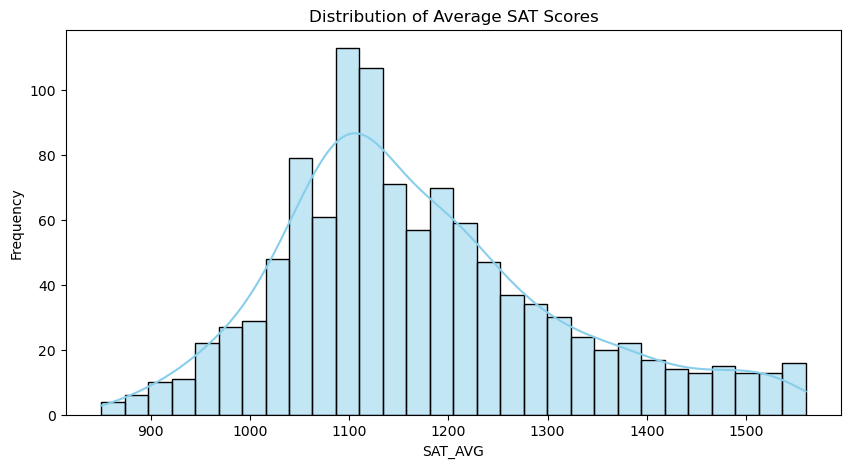

In [16]:
# Histogram: Distribution of Average SAT Scores
plt.figure(figsize=(10, 5))
sns.histplot(df['SAT_AVG'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Average SAT Scores')
plt.xlabel('SAT_AVG')
plt.ylabel('Frequency')
plt.show()

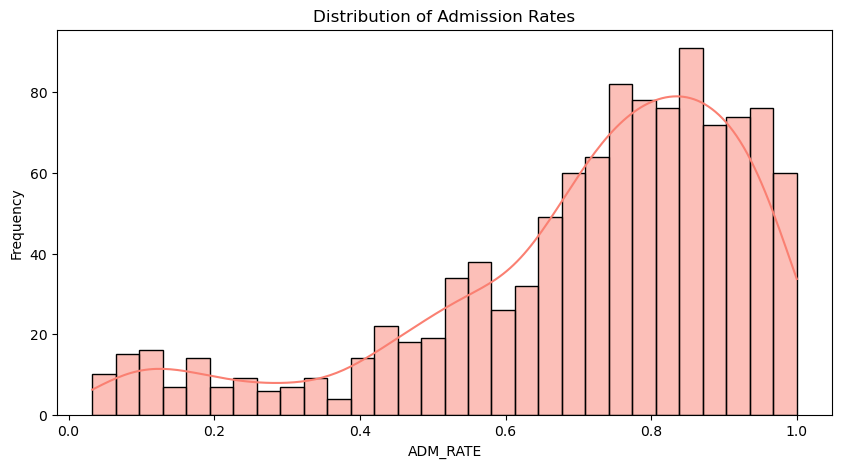

In [17]:
# Histogram: Distribution of Admission Rate (ADM_RATE)
plt.figure(figsize=(10, 5))
sns.histplot(df['ADM_RATE'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Admission Rates')
plt.xlabel('ADM_RATE')
plt.ylabel('Frequency')
plt.show()

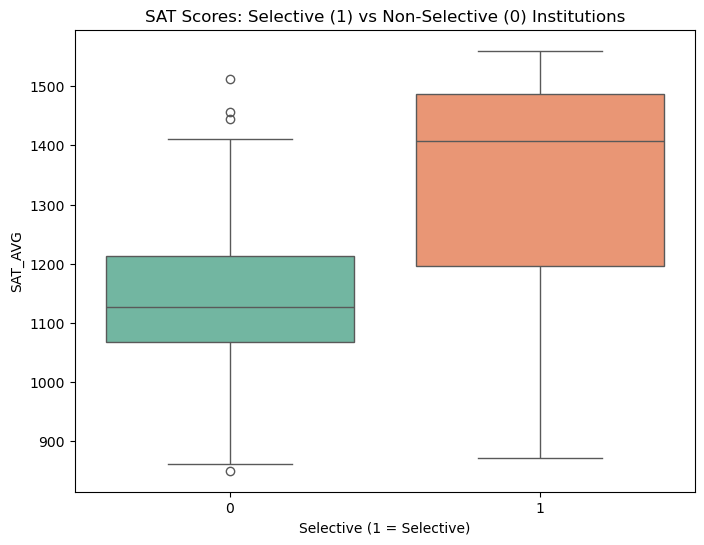

In [18]:
# Boxplot: Compare SAT_AVG for Selective vs Non-selective Institutions.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Selective', y='SAT_AVG', data=df, palette='Set2')
plt.title('SAT Scores: Selective (1) vs Non-Selective (0) Institutions')
plt.xlabel('Selective (1 = Selective)')
plt.ylabel('SAT_AVG')
plt.show()

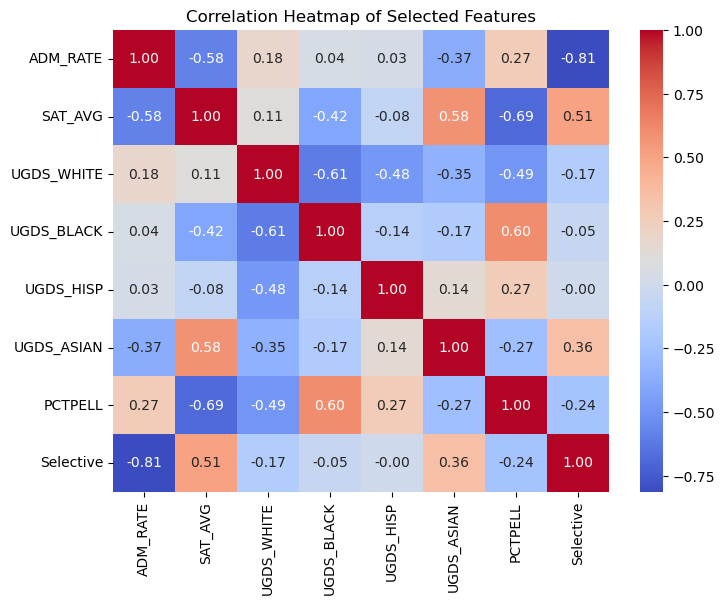

In [19]:
# Correlation heatmap among selected numeric features including our target.
plt.figure(figsize=(8, 6))
corr = df[selected_columns + ['Selective']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()

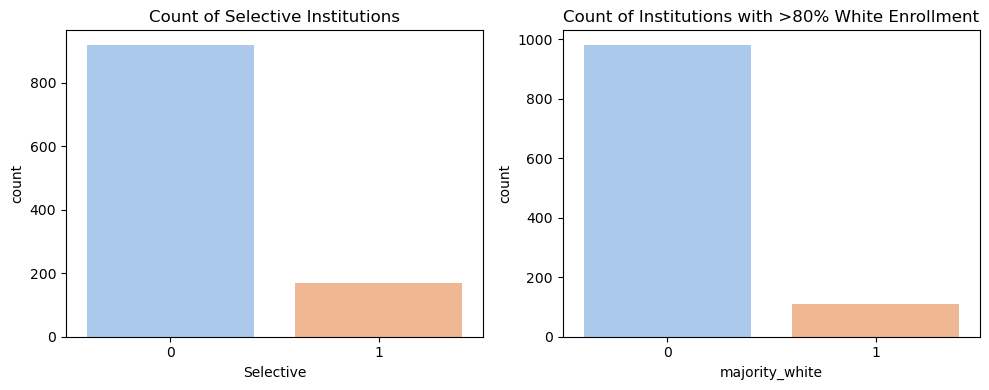

In [20]:
# Count plots: Distribution for binary features
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='Selective', data=df, palette='pastel')
plt.title('Count of Selective Institutions')
plt.subplot(1,2,2)
sns.countplot(x='majority_white', data=df, palette='pastel')
plt.title('Count of Institutions with >80% White Enrollment')
plt.tight_layout()
plt.show()

### Splitting Data for Modeling

In [25]:
# For the baseline model, we use SAT_AVG as our primary feature.
features = ['SAT_AVG']
X = df[features]
y = df['Selective']
sensitive = df['majority_white']  # sensitive attribute for fairness analysis

In [41]:
# Split data into training and testing sets (80% train, 20% test).
X_train, X_test, y_train, y_test, sensitive_train, sensitive_test = train_test_split(
    X, y, sensitive, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (871, 1)
Test set size: (218, 1)


### Model Building - Baseline Model

In [28]:
# Train a logistic regression model to predict whether an institution is selective.
baseline_model = LogisticRegression()
baseline_model.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predict on the test set.
y_pred = baseline_model.predict(X_test)

In [42]:
# Evaluate performance: Accuracy, ROC AUC, and classification report.
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])
print("\nBaseline Model Performance:")
print("Accuracy:", acc)
print("ROC AUC:", roc)


Baseline Model Performance:
Accuracy: 0.9357798165137615
ROC AUC: 0.7816697191697192


In [43]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       182
           1       1.00      0.61      0.76        36

    accuracy                           0.94       218
   macro avg       0.96      0.81      0.86       218
weighted avg       0.94      0.94      0.93       218



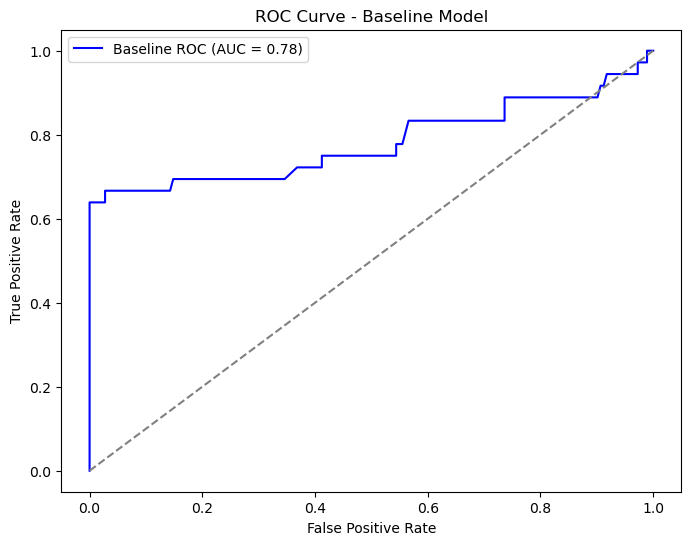

In [44]:
# Plot the ROC curve for the baseline model.
fpr, tpr, _ = roc_curve(y_test, baseline_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Baseline ROC (AUC = {roc:.2f})', color='blue')
plt.plot([0,1], [0,1], '--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Model')
plt.legend()
plt.show()

#### Fairness Evaluation on Baseline Model

In [32]:
# Compute fairness metrics using Fairlearn.
dp_diff = demographic_parity_difference(y_test, y_pred, sensitive_features=sensitive_test)
eo_diff = equalized_odds_difference(y_test, y_pred, sensitive_features=sensitive_test)
print("\nFairness Metrics (Baseline Model):")
print("Demographic Parity Difference:", dp_diff)
print("Equalized Odds Difference:", eo_diff)


Fairness Metrics (Baseline Model):
Demographic Parity Difference: 0.1111111111111111
Equalized Odds Difference: 0.6111111111111112


#### Bias Mitigation Using Fairlearn

In [33]:
# Apply the Exponentiated Gradient reduction with Demographic Parity as the fairness constraint.
base_estimator = LogisticRegression()
constraint = DemographicParity()

mitigator = ExponentiatedGradient(estimator=base_estimator, constraints=constraint)
mitigator.fit(X_train, y_train, sensitive_features=sensitive_train)

ExponentiatedGradient(constraints=<fairlearn.reductions._moments.utility_parity.DemographicParity object at 0x3245b05f0>,
                      estimator=LogisticRegression(), nu=0.004638380699262274)

In [34]:
# Predict using the mitigated model.
y_pred_mitigated = mitigator.predict(X_test)

In [35]:
# Evaluate performance of the mitigated model using binary predictions only.
acc_mitigated = accuracy_score(y_test, y_pred_mitigated)
print("\nMitigated Model Performance (Binary Metrics):")
print("Accuracy:", acc_mitigated)
print("Classification Report:\n", classification_report(y_test, y_pred_mitigated))


Mitigated Model Performance (Binary Metrics):
Accuracy: 0.8669724770642202
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       182
           1       1.00      0.19      0.33        36

    accuracy                           0.87       218
   macro avg       0.93      0.60      0.63       218
weighted avg       0.89      0.87      0.83       218



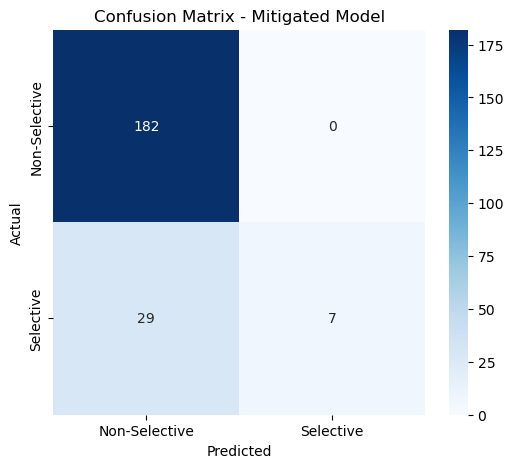

In [36]:
conf_mat = confusion_matrix(y_test, y_pred_mitigated)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Non-Selective", "Selective"],
            yticklabels=["Non-Selective", "Selective"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Mitigated Model")
plt.show()

In [37]:
# Compute fairness metrics after bias mitigation.
dp_diff_mitigated = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_test)
eo_diff_mitigated = equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=sensitive_test)
print("\nFairness Metrics (Mitigated Model):")
print("Demographic Parity Difference:", dp_diff_mitigated)
print("Equalized Odds Difference:", eo_diff_mitigated)


Fairness Metrics (Mitigated Model):
Demographic Parity Difference: 0.03535353535353535
Equalized Odds Difference: 0.19444444444444445


#### Visualize Fairness Metrics Comparison

Text(0, 0.5, 'Difference')

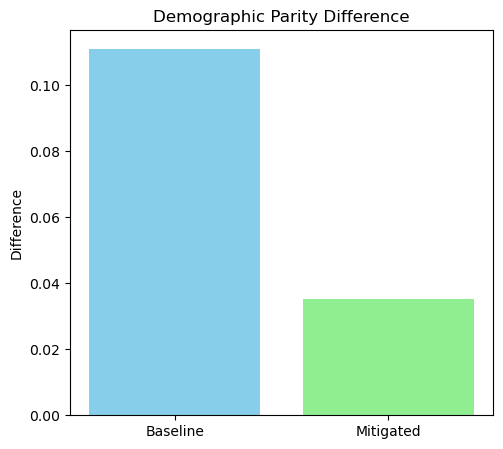

In [45]:
labels = ['Baseline', 'Mitigated']
dp_values = [dp_diff, dp_diff_mitigated]
eo_values = [eo_diff, eo_diff_mitigated]

plt.figure(figsize=(12, 5))
# Demographic Parity Difference bar chart.
plt.subplot(1, 2, 1)
plt.bar(labels, dp_values, color=['skyblue', 'lightgreen'])
plt.title('Demographic Parity Difference')
plt.ylabel('Difference')

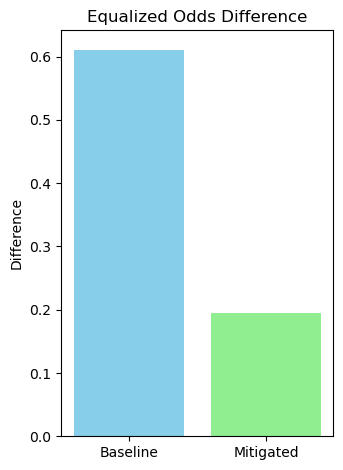

In [46]:
# Equalized Odds Difference bar chart.
plt.subplot(1, 2, 2)
plt.bar(labels, eo_values, color=['skyblue', 'lightgreen'])
plt.title('Equalized Odds Difference')
plt.ylabel('Difference')
plt.tight_layout()
plt.show()